# Discover Your Path 2022

## Notebook Submission Template

This notebook is one of the mandatory deliverables when you submit your solution. Its structure follows the 'Discover Your Path' evaluation criteria and it has dedicated cells where you should add information. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work. Make sure to list all the datasets used besides the ones provided.

Instructions:
1. 🧱 Create a separate copy of this template and try to preserve the predefined structure (feel free to change the structure as long as it keeps the notebook clean)
2. 👥 Fill in the Authors section with the name of each team member
3. 💻 Develop your code - make sure to add comments and save all the output you want the jury to see. Your code **must be** runnable!
6. 📥 Export as HTML/IPYNB and make sure all the visualisations are visible
7. ⬆️ Send video-pitch and the HTML/IPYNB file to the the following email, make sure that all the visualisations are visible and everything (text, images, ..) in all deliverables renders correctly
    - bi&analyticsedpc@edp.com

## 🎯 Energy Transition Data Challenge​
###### The Solar Use Case - Churn Prediction

## Team: 37
## 👥 Authors
* Jorge Completo
* Francisca Santos
* Margarida Martins

## 💻 Development
Start coding here! 🐱‍🏍

Create the necessary subsections (e.g. EDA, Data Preparation, different experiments, etc..) and markdown cells to include descriptions of your work where you see fit. Comment your code. 

All new subsections must start with three hash characters.

Pro-tip 1: Don't forget to make the jury's life easier. Remove any unnecessary prints before submitting the work. Hide any long output cells (from training a model for example). For each subsection, have a quick introduction (justifying what you are about to do) and conclusion (results you got from what you did). 

Pro-tip 2: Have many similiar graphs which all tell the same story? Add them to the appendix and show only a couple of examples, with the mention that all the others are in the appendix.

### 1. Importing packages and the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

from itertools import combinations
from functools import reduce

In [2]:
df = pd.read_csv('/Users/jorgecompleto/Documents/Data Science/Projetos Data Science/dyp/dados_estruturados/sample_churn_solar.csv', sep = ';')
df.set_index('client', inplace = True)
df.head()


,date,flg_eletricidade_ativo,flg_gas_ativo,flg_easy_ativo,flg_smart_ativo,flg_full_ativo,potencia_contratada,qtd_os_packs,qtd_os_packs_abertas,qtd_os_excl_packs,...,qtd_po_aberto,qtd_rec_aberto,eletricidade_yrsrecensy,gas_yrsrecensy,contract_days,escalao_consumo,flg_deb_direto,flg_fatura_eletronica,divida_total,churn_label
client,,,,,,,,,,,,,,,,,,,,,
89,01/03/2021,1,0,0,1,0,13.80,0,0,0,...,0,0,9.094,NaN,332,NaN,0,0,0.00,0
200,01/11/2021,1,0,0,1,0,17.25,2,2,0,...,0,0,8.882,NaN,238,NaN,1,1,0.00,0
240,01/04/2022,1,1,0,1,0,6.90,1,0,0,...,0,0,9.245,9.204,59,1.0,1,0,7.90,0
400,01/11/2021,1,1,0,0,1,6.90,2,0,0,...,0,0,8.403,8.403,66,1.0,1,1,0.00,0
430,01/11/2021,1,1,0,1,0,4.60,3,0,0,...,0,0,8.272,8.081,77,1.0,1,0,-30.79,0


### 2. Exploring the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5894 entries, 89 to 5715
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       5894 non-null   object 
 1   flg_eletricidade_ativo     5894 non-null   int64  
 2   flg_gas_ativo              5894 non-null   int64  
 3   flg_easy_ativo             5894 non-null   int64  
 4   flg_smart_ativo            5894 non-null   int64  
 5   flg_full_ativo             5894 non-null   int64  
 6   potencia_contratada        5360 non-null   float64
 7   qtd_os_packs               5894 non-null   int64  
 8   qtd_os_packs_abertas       5894 non-null   int64  
 9   qtd_os_excl_packs          5894 non-null   int64  
 10  qtd_os_excl_packs_abertas  5894 non-null   int64  
 11  qtd_pi                     5894 non-null   int64  
 12  qtd_pi_aberto              5894 non-null   int64  
 13  qtd_po                     5894 non-null   int6

At first we see we have missing values in the features **potencia_contratada**, **gas_yrsrecensy**, **eletricidade_yrsrecensy**, and **escalao_consumo**.\
We will have to deal with those later on.

In [43]:
df[['potencia_contratada', 'eletricidade_yrsrecensy', 'gas_yrsrecensy', 'escalao_consumo']].isna().sum()

potencia_contratada         534
eletricidade_yrsrecensy      54
gas_yrsrecensy             3749
escalao_consumo            3926
dtype: int64

In [4]:
df['date'].value_counts()

01/04/2022    415
01/02/2022    386
01/01/2022    366
01/03/2022    366
01/11/2021    350
01/12/2021    347
01/09/2021    325
01/08/2021    321
01/07/2021    318
01/05/2021    317
01/10/2021    307
01/06/2021    294
01/04/2021    263
01/02/2021    262
01/03/2021    244
01/01/2021    236
01/12/2020    232
01/11/2020    204
01/10/2020    176
01/09/2020    165
Name: date, dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df[df.duplicated(keep = False)]

,date,flg_eletricidade_ativo,flg_gas_ativo,flg_easy_ativo,flg_smart_ativo,flg_full_ativo,potencia_contratada,qtd_os_packs,qtd_os_packs_abertas,qtd_os_excl_packs,...,qtd_po_aberto,qtd_rec_aberto,eletricidade_yrsrecensy,gas_yrsrecensy,contract_days,escalao_consumo,flg_deb_direto,flg_fatura_eletronica,divida_total,churn_label
client,,,,,,,,,,,,,,,,,,,,,


There are no duplicates in our dataset!

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
flg_eletricidade_ativo,5894.0,0.909399,0.287065,0.000,1.000,1.000,1.000,1.000
flg_gas_ativo,5894.0,0.354598,0.478432,0.000,0.000,0.000,1.000,1.000
flg_easy_ativo,5894.0,0.074822,0.263126,0.000,0.000,0.000,0.000,1.000
flg_smart_ativo,5894.0,0.513064,0.499872,0.000,0.000,1.000,1.000,1.000
flg_full_ativo,5894.0,0.411435,0.492136,0.000,0.000,0.000,1.000,1.000
potencia_contratada,5360.0,5.837108,3.120228,1.150,3.450,4.600,6.900,41.400
qtd_os_packs,5894.0,1.834069,1.759497,0.000,0.000,2.000,3.000,16.000
qtd_os_packs_abertas,5894.0,0.788090,1.063273,0.000,0.000,0.000,2.000,5.000
qtd_os_excl_packs,5894.0,0.754157,2.038938,0.000,0.000,0.000,0.000,31.000
qtd_os_excl_packs_abertas,5894.0,0.077876,0.378726,0.000,0.000,0.000,0.000,5.000


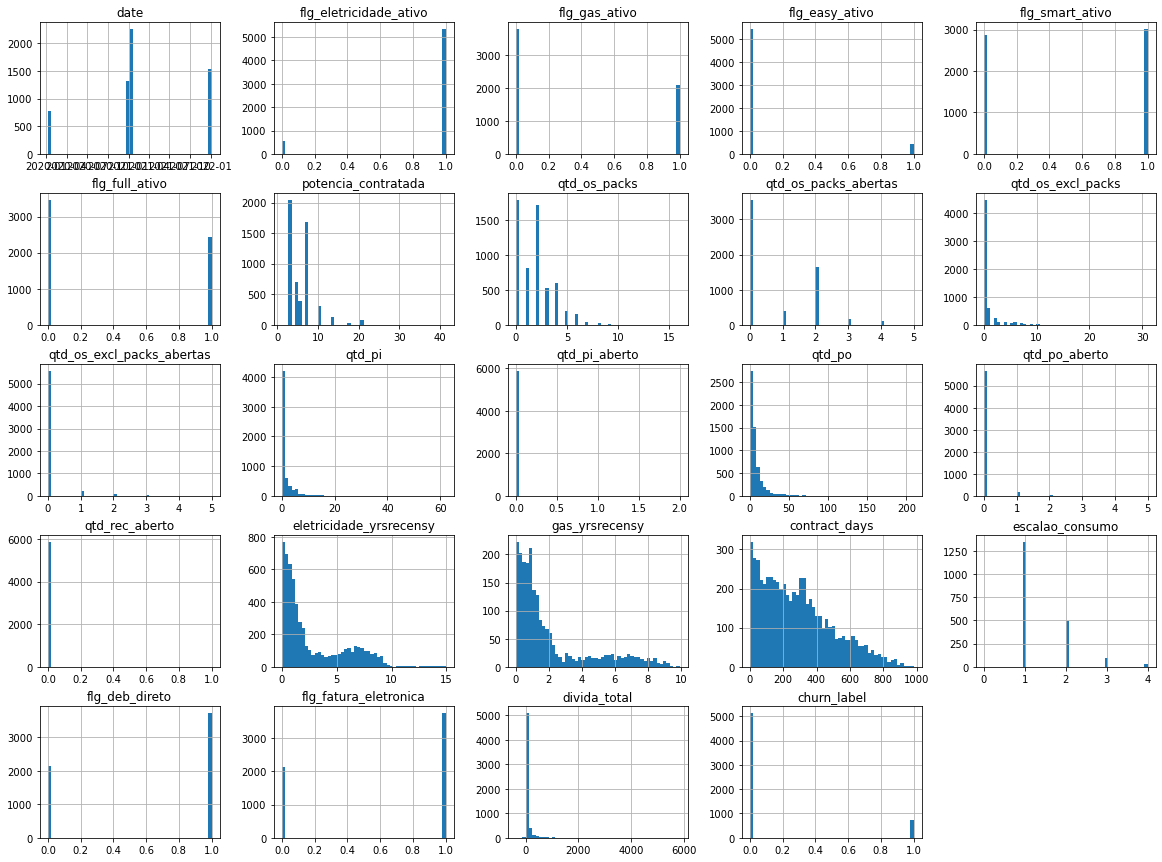

In [8]:
%matplotlib inline
df.hist(bins = 50, figsize = (20, 15))
plt.show()

We seem to have a very imbalanced dataset, given that our target variable which is **churn_label** is mainly composed by 0s (no churned clients). \
We will need to take this into consideration when selecting a metric to evaluate and compare our models and when doing data partition.

In [16]:
df_churn = df[df['churn_label'] == 1]
df_churn[['date', 'churn_label']].value_counts() / len(df_churn)

date        churn_label
2021-01-05  1              0.072678
2022-01-04  1              0.069987
2021-01-07  1              0.068641
2022-01-03  1              0.063257
2021-01-12  1              0.060565
2021-01-11  1              0.060565
2021-01-08  1              0.059219
2022-01-02  1              0.055182
2022-01-01  1              0.049798
2021-01-09  1              0.047106
2021-01-06  1              0.047106
2020-01-12  1              0.045760
2021-01-04  1              0.045760
2021-01-02  1              0.044415
2021-01-03  1              0.041723
2021-01-01  1              0.039031
2021-01-10  1              0.037685
2020-01-11  1              0.037685
2020-01-09  1              0.028264
2020-01-10  1              0.025572
dtype: float64

Doesn't seem to be a lot of difference between the number of clients that have churned in the year 2020, 2021, and 2022.

In [21]:
corr_matrix = df.corr()
corr_matrix['churn_label'].sort_values(ascending= True)

flg_eletricidade_ativo      -0.259435
qtd_os_packs_abertas        -0.197868
qtd_os_packs                -0.131241
flg_deb_direto              -0.068070
flg_fatura_eletronica       -0.048961
qtd_os_excl_packs           -0.045716
flg_gas_ativo               -0.044307
potencia_contratada         -0.044266
qtd_os_excl_packs_abertas   -0.033558
eletricidade_yrsrecensy     -0.031268
flg_easy_ativo              -0.016694
gas_yrsrecensy              -0.012922
escalao_consumo             -0.011311
qtd_pi                       0.000339
flg_full_ativo               0.001354
flg_smart_ativo              0.005925
divida_total                 0.009652
contract_days                0.013457
qtd_pi_aberto                0.014626
qtd_po                       0.014686
qtd_po_aberto                0.051669
qtd_rec_aberto               0.061980
churn_label                  1.000000
Name: churn_label, dtype: float64

The feature **qtd_pi** seem to have a low positive correlation with the target variable.

In [22]:
df.skew()

flg_eletricidade_ativo       -2.853283
flg_gas_ativo                 0.608034
flg_easy_ativo                3.232843
flg_smart_ativo              -0.052288
flg_full_ativo                0.360042
potencia_contratada           2.570455
qtd_os_packs                  1.152192
qtd_os_packs_abertas          0.987160
qtd_os_excl_packs             4.652556
qtd_os_excl_packs_abertas     6.320834
qtd_pi                        6.042990
qtd_pi_aberto                36.933913
qtd_po                        5.127364
qtd_po_aberto                 7.083125
qtd_rec_aberto               19.751821
eletricidade_yrsrecensy       1.168084
gas_yrsrecensy                1.468054
contract_days                 0.714059
escalao_consumo               1.698389
flg_deb_direto               -0.562729
flg_fatura_eletronica        -0.580292
divida_total                  8.230242
churn_label                   2.253782
dtype: float64

How to interpret the skewness:

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed.

As we can observe most of our variables are not symmetrical, later on we will use feature scaling to apply a MinMax scaler to the data.

In [23]:
df.kurt()

flg_eletricidade_ativo          6.143308
flg_gas_ativo                  -1.630848
flg_easy_ativo                  8.454140
flg_smart_ativo                -1.997944
flg_full_ativo                 -1.871005
potencia_contratada            10.213906
qtd_os_packs                    2.164605
qtd_os_packs_abertas           -0.028073
qtd_os_excl_packs              33.017886
qtd_os_excl_packs_abertas      48.948692
qtd_pi                         63.135562
qtd_pi_aberto                1524.698588
qtd_po                         42.419342
qtd_po_aberto                  71.007711
qtd_rec_aberto                388.266198
eletricidade_yrsrecensy         0.535245
gas_yrsrecensy                  0.995753
contract_days                  -0.192988
escalao_consumo                 2.735641
flg_deb_direto                 -1.683908
flg_fatura_eletronica          -1.663826
divida_total                   96.432755
churn_label                     3.080580
dtype: float64

Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0. Along with skewness, kurtosis is an important descriptive statistic of data distribution. However, the two concepts must not be confused with each other. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

* High kurtosis in a data set is an indicator that data has heavy outliers.
* Low kurtosis in a data set is an indicator that data has lack of outliers.

We will check if the variables with the highest kurtosis have outliers.


In [34]:
columns = df.columns
for i in columns[1:-1]:
    print(i)
    print(df[i].value_counts())
    print('')
    print('**************')

flg_eletricidade_ativo
1    5360
0     534
Name: flg_eletricidade_ativo, dtype: int64

**************
flg_gas_ativo
0    3804
1    2090
Name: flg_gas_ativo, dtype: int64

**************
flg_easy_ativo
0    5453
1     441
Name: flg_easy_ativo, dtype: int64

**************
flg_smart_ativo
1    3024
0    2870
Name: flg_smart_ativo, dtype: int64

**************
flg_full_ativo
0    3469
1    2425
Name: flg_full_ativo, dtype: int64

**************
potencia_contratada
3.45     2047
6.90     1675
4.60      696
5.75      385
10.35     310
13.80     130
20.70      78
17.25      34
1.15        2
2.30        2
41.40       1
Name: potencia_contratada, dtype: int64

**************
qtd_os_packs
0     1799
2     1722
1      814
4      603
3      525
5      194
6      150
7       45
8       20
9       12
10       5
11       3
13       1
16       1
Name: qtd_os_packs, dtype: int64

**************
qtd_os_packs_abertas
0    3565
2    1643
1     409
3     166
4     103
5       8
Name: qtd_os_packs_abertas,

The feature **qtd_pi_aberto** refers to the amount of information tickets opened by a client. This feature is highly skewed because most of the clients don't have any information tickets opened and there are 5 clients with 1 and only 1 client with 2 tickets opened. We would have to decide if we should keep or drop this variable in feature selection. 

<AxesSubplot:>

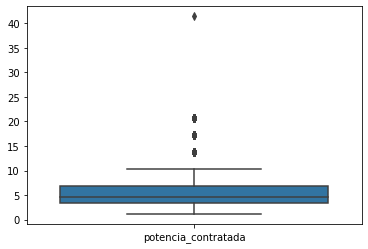

In [41]:
sns.boxplot(data = df[['potencia_contratada']])

Logistic Regression, Decision Tree, Random Forest, SVM, XGBoost.

## 👓 References
List all of the external links (even if they are already linked above), such as external datasets, papers, blog posts, code repositories and any other materials.

## ⏭️ Appendix
Add here any code, images or text that you still find relevant, but that was too long to include in the main report. This section is optional.